# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

In [2]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [3]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [4]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
# 80% for training.
X_train = dataset[:4000, 1:].reshape(4000,1,28, 28).astype( 'float32' )
y_train = dataset[:4000,0]
# 20% for test.
X_test = dataset[4000:, 1:].reshape(1000,1,28, 28).astype( 'float32' )
y_test = dataset[4000:,0]

In [5]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [126]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares variando parâmetros não previstos no enunciado do TP. 

In [29]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
outputsGD = []
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])

In [30]:
inputsSGD = []
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
outputsSGD = []
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])

In [31]:
inputsMiniBatch10 = []
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
outputsMiniBatch10 = []
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])

In [32]:
inputsMiniBatch50 = []
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
outputsMiniBatch50 = []
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])

In [33]:
# Use the model by parameters.
def use_model(lr, un, gradient, index, x_axis):
    
    for l, u in zip(lr, un):
        if x_axis == 'lr':
            x = l
        else:
            x = u
        
        if gradient == 'gd':
            inputsGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsGD[index].append(100-scores[1]*100)
        elif gradient == 'sgd':
            inputsSGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsSGD[index].append(100-scores[1]*100)
        elif gradient == 'mb10':
            inputsMiniBatch10[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch10[index].append(100-scores[1]*100)
        elif gradient == 'mb50':
            inputsMiniBatch50[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch50[index].append(100-scores[1]*100)

In [34]:
# GD.
use_model([0.5, 1, 10], [25, 25, 25], 'gd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 372us/step - loss: 2.5703 - acc: 0.0945 - val_loss: 2.3285 - val_acc: 0.1270
Epoch 2/10
4000/4000 [==============================] - 0s 62us/step - loss: 2.3370 - acc: 0.0948 - val_loss: 2.3101 - val_acc: 0.0820
Epoch 3/10
4000/4000 [==============================] - 0s 66us/step - loss: 2.3004 - acc: 0.1045 - val_loss: 2.2855 - val_acc: 0.1500
Epoch 4/10
4000/4000 [==============================] - 0s 62us/step - loss: 2.2894 - acc: 0.1297 - val_loss: 2.2848 - val_acc: 0.1380
Epoch 5/10
4000/4000 [==============================] - 0s 76us/step - loss: 2.2831 - acc: 0.1320 - val_loss: 2.2761 - val_acc: 0.1350
Epoch 6/10
4000/4000 [==============================] - 0s 69us/step - loss: 2.2773 - acc: 0.1290 - val_loss: 2.2721 - val_acc: 0.1460
Epoch 7/10
4000/4000 [==============================] - 0s 70us/step - loss: 2.2716 - acc: 0.1470 - val_loss: 2.2652 - val_acc: 0.1690
Epoch 

In [35]:
# SGD.
use_model([0.5, 1, 10], [25, 25, 25], 'sgd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 43s 11ms/step - loss: 5.3272 - acc: 0.0925 - val_loss: 3.9837 - val_acc: 0.1290
Epoch 2/10
4000/4000 [==============================] - 32s 8ms/step - loss: 3.4387 - acc: 0.1198 - val_loss: 2.5716 - val_acc: 0.1930
Epoch 3/10
4000/4000 [==============================] - 47s 12ms/step - loss: 3.8915 - acc: 0.1077 - val_loss: 3.8329 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 34s 9ms/step - loss: 4.1815 - acc: 0.1080 - val_loss: 4.2627 - val_acc: 0.1600
Epoch 5/10
4000/4000 [==============================] - 44s 11ms/step - loss: 3.9323 - acc: 0.1677 - val_loss: 4.7483 - val_acc: 0.0820
Epoch 6/10
4000/4000 [==============================] - 51s 13ms/step - loss: 4.1566 - acc: 0.1227 - val_loss: 4.6250 - val_acc: 0.0920
Epoch 7/10
4000/4000 [==============================] - 40s 10ms/step - loss: 4.1499 - acc: 0.1015 - val_loss: 4.4572 - val_acc: 0.1210
Ep

In [36]:
# MB10.
use_model([0.5, 1, 10], [25, 25, 25], 'mb10', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 4s 1ms/step - loss: 1.6691 - acc: 0.3915 - val_loss: 0.8136 - val_acc: 0.7370
Epoch 2/10
4000/4000 [==============================] - 3s 788us/step - loss: 0.6378 - acc: 0.7940 - val_loss: 0.5519 - val_acc: 0.8360
Epoch 3/10
4000/4000 [==============================] - 3s 793us/step - loss: 0.4489 - acc: 0.8595 - val_loss: 0.4563 - val_acc: 0.8570
Epoch 4/10
4000/4000 [==============================] - 3s 794us/step - loss: 0.3529 - acc: 0.8922 - val_loss: 0.4152 - val_acc: 0.8830
Epoch 5/10
4000/4000 [==============================] - 3s 786us/step - loss: 0.2699 - acc: 0.9107 - val_loss: 0.4365 - val_acc: 0.8670
Epoch 6/10
4000/4000 [==============================] - 3s 785us/step - loss: 0.2221 - acc: 0.9305 - val_loss: 0.4056 - val_acc: 0.8790
Epoch 7/10
4000/4000 [==============================] - 3s 786us/step - loss: 0.1771 - acc: 0.9405 - val_loss: 0.3864 - val_acc: 0.8920
Ep

In [37]:
# MB50.
use_model([0.5, 1, 10], [25, 25, 25], 'mb50', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 3s 696us/step - loss: 2.0669 - acc: 0.2577 - val_loss: 1.5018 - val_acc: 0.5050
Epoch 2/10
4000/4000 [==============================] - 1s 270us/step - loss: 1.2689 - acc: 0.5710 - val_loss: 1.2534 - val_acc: 0.5020
Epoch 3/10
4000/4000 [==============================] - 1s 233us/step - loss: 0.8088 - acc: 0.7345 - val_loss: 0.8146 - val_acc: 0.6980
Epoch 4/10
4000/4000 [==============================] - 1s 263us/step - loss: 0.6187 - acc: 0.8012 - val_loss: 0.6454 - val_acc: 0.8000
Epoch 5/10
4000/4000 [==============================] - 1s 237us/step - loss: 0.5292 - acc: 0.8375 - val_loss: 0.5237 - val_acc: 0.8380
Epoch 6/10
4000/4000 [==============================] - 1s 233us/step - loss: 0.4523 - acc: 0.8597 - val_loss: 0.4361 - val_acc: 0.8660
Epoch 7/10
4000/4000 [==============================] - 1s 237us/step - loss: 0.3974 - acc: 0.8785 - val_loss: 0.4272 - val_acc: 0.8710


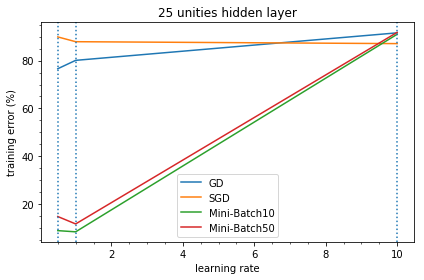

In [51]:
index = 0

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('img/25-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

In [40]:
# GD.
use_model([0.5, 1, 10], [50, 50, 50], 'gd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 475us/step - loss: 2.5697 - acc: 0.0978 - val_loss: 2.3620 - val_acc: 0.1210
Epoch 2/10
4000/4000 [==============================] - 0s 87us/step - loss: 2.3502 - acc: 0.1130 - val_loss: 2.3090 - val_acc: 0.0820
Epoch 3/10
4000/4000 [==============================] - 0s 76us/step - loss: 2.3021 - acc: 0.1045 - val_loss: 2.2786 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 84us/step - loss: 2.2805 - acc: 0.1125 - val_loss: 2.2696 - val_acc: 0.1060
Epoch 5/10
4000/4000 [==============================] - 0s 75us/step - loss: 2.2714 - acc: 0.1175 - val_loss: 2.2618 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 74us/step - loss: 2.2619 - acc: 0.1125 - val_loss: 2.2506 - val_acc: 0.1390
Epoch 7/10
4000/4000 [==============================] - 1s 199us/step - loss: 2.2544 - acc: 0.1287 - val_loss: 2.2481 - val_acc: 0.1210
Epoch

In [41]:
# SGD.
use_model([0.5, 1, 10], [50, 50, 50], 'sgd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 67s 17ms/step - loss: 14.6269 - acc: 0.0922 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 2/10
4000/4000 [==============================] - 47s 12ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 3/10
4000/4000 [==============================] - 43s 11ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 4/10
4000/4000 [==============================] - 46s 11ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 5/10
4000/4000 [==============================] - 38s 9ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 6/10
4000/4000 [==============================] - 38s 9ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 7/10
4000/4000 [==============================] - 41s 10ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_

In [42]:
# MB10.
use_model([0.5, 1, 10], [50, 50, 50], 'mb10', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 1.5596 - acc: 0.4375 - val_loss: 0.7534 - val_acc: 0.7240
Epoch 2/10
4000/4000 [==============================] - 4s 875us/step - loss: 0.5816 - acc: 0.8107 - val_loss: 0.5548 - val_acc: 0.8100
Epoch 3/10
4000/4000 [==============================] - 4s 877us/step - loss: 0.4120 - acc: 0.8707 - val_loss: 0.4270 - val_acc: 0.8670
Epoch 4/10
4000/4000 [==============================] - 4s 875us/step - loss: 0.3198 - acc: 0.8962 - val_loss: 0.3677 - val_acc: 0.8790
Epoch 5/10
4000/4000 [==============================] - 4s 890us/step - loss: 0.2459 - acc: 0.9200 - val_loss: 0.3477 - val_acc: 0.8970
Epoch 6/10
4000/4000 [==============================] - 3s 871us/step - loss: 0.2008 - acc: 0.9345 - val_loss: 0.3732 - val_acc: 0.8930
Epoch 7/10
4000/4000 [==============================] - 4s 884us/step - loss: 0.1536 - acc: 0.9502 - val_loss: 0.3015 - val_acc: 0.9120
Ep

In [43]:
# MB50.
use_model([0.5, 1, 10], [50, 50, 50], 'mb50', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 569us/step - loss: 2.1107 - acc: 0.2307 - val_loss: 1.8153 - val_acc: 0.3180
Epoch 2/10
4000/4000 [==============================] - 1s 221us/step - loss: 1.1997 - acc: 0.5875 - val_loss: 0.8953 - val_acc: 0.7260
Epoch 3/10
4000/4000 [==============================] - 1s 225us/step - loss: 0.7291 - acc: 0.7687 - val_loss: 0.6696 - val_acc: 0.7670
Epoch 4/10
4000/4000 [==============================] - 1s 217us/step - loss: 0.5524 - acc: 0.8175 - val_loss: 0.5315 - val_acc: 0.8240
Epoch 5/10
4000/4000 [==============================] - 1s 218us/step - loss: 0.4683 - acc: 0.8542 - val_loss: 0.4782 - val_acc: 0.8420
Epoch 6/10
4000/4000 [==============================] - 1s 227us/step - loss: 0.3977 - acc: 0.8700 - val_loss: 0.5144 - val_acc: 0.8500
Epoch 7/10
4000/4000 [==============================] - 1s 216us/step - loss: 0.3654 - acc: 0.8865 - val_loss: 0.4812 - val_acc: 0.8550


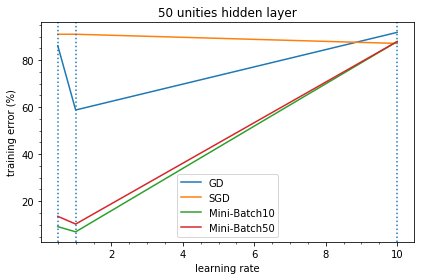

In [52]:
index = 1

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('img/50-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

In [45]:
# GD.
use_model([0.5, 1, 10], [100, 100, 100], 'gd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 3s 657us/step - loss: 2.5289 - acc: 0.0960 - val_loss: 2.5646 - val_acc: 0.0940
Epoch 2/10
4000/4000 [==============================] - 0s 79us/step - loss: 2.5167 - acc: 0.1032 - val_loss: 2.3131 - val_acc: 0.1500
Epoch 3/10
4000/4000 [==============================] - 0s 68us/step - loss: 2.3198 - acc: 0.1170 - val_loss: 2.3046 - val_acc: 0.1740
Epoch 4/10
4000/4000 [==============================] - 0s 86us/step - loss: 2.3071 - acc: 0.1825 - val_loss: 2.3391 - val_acc: 0.0820
Epoch 5/10
4000/4000 [==============================] - 0s 80us/step - loss: 2.3248 - acc: 0.1045 - val_loss: 2.3124 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 80us/step - loss: 2.3450 - acc: 0.1128 - val_loss: 2.4197 - val_acc: 0.0820
Epoch 7/10
4000/4000 [==============================] - 0s 82us/step - loss: 2.3837 - acc: 0.1045 - val_loss: 2.2942 - val_acc: 0.1210
Epoch 

In [46]:
# SGD.
use_model([0.5, 1, 10], [100, 100, 100], 'sgd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 33s 8ms/step - loss: 14.5713 - acc: 0.0958 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 2/10
4000/4000 [==============================] - 36s 9ms/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 3/10
4000/4000 [==============================] - 29s 7ms/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 4/10
4000/4000 [==============================] - 30s 7ms/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 5/10
4000/4000 [==============================] - 40s 10ms/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 6/10
4000/4000 [==============================] - 39s 10ms/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 7/10
4000/4000 [==============================] - 38s 10ms/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_ac

In [47]:
# MB10.
use_model([0.5, 1, 10], [100, 100, 100], 'mb10', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 8s 2ms/step - loss: 1.9214 - acc: 0.3765 - val_loss: 1.2842 - val_acc: 0.5710
Epoch 2/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.7496 - acc: 0.7440 - val_loss: 0.7696 - val_acc: 0.7450
Epoch 3/10
4000/4000 [==============================] - 6s 1ms/step - loss: 0.5877 - acc: 0.8080 - val_loss: 0.5532 - val_acc: 0.8250
Epoch 4/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4670 - acc: 0.8522 - val_loss: 0.5738 - val_acc: 0.8340
Epoch 5/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4055 - acc: 0.8727 - val_loss: 0.5032 - val_acc: 0.8640
Epoch 6/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3609 - acc: 0.8832 - val_loss: 0.8729 - val_acc: 0.7630
Epoch 7/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2881 - acc: 0.9065 - val_loss: 0.3688 - val_acc: 0.8840
Epoch 8/10
400

In [48]:
# MB50.
use_model([0.5, 1, 10], [100, 100, 100], 'mb50', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 2.2465 - acc: 0.2050 - val_loss: 1.7656 - val_acc: 0.2950
Epoch 2/10
4000/4000 [==============================] - 2s 377us/step - loss: 1.2666 - acc: 0.5633 - val_loss: 0.8342 - val_acc: 0.7460
Epoch 3/10
4000/4000 [==============================] - 1s 335us/step - loss: 0.8032 - acc: 0.7280 - val_loss: 0.6484 - val_acc: 0.7960
Epoch 4/10
4000/4000 [==============================] - 1s 296us/step - loss: 0.5788 - acc: 0.8165 - val_loss: 0.5487 - val_acc: 0.8410
Epoch 5/10
4000/4000 [==============================] - 1s 362us/step - loss: 0.5008 - acc: 0.8382 - val_loss: 0.5302 - val_acc: 0.8370
Epoch 6/10
4000/4000 [==============================] - 1s 299us/step - loss: 0.4267 - acc: 0.8645 - val_loss: 0.4353 - val_acc: 0.8660
Epoch 7/10
4000/4000 [==============================] - 1s 291us/step - loss: 0.3769 - acc: 0.8835 - val_loss: 0.4043 - val_acc: 0.8700
Ep

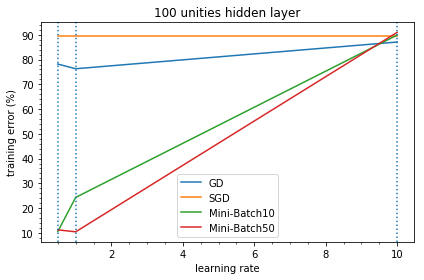

In [53]:
index = 2

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("100 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('img/100-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

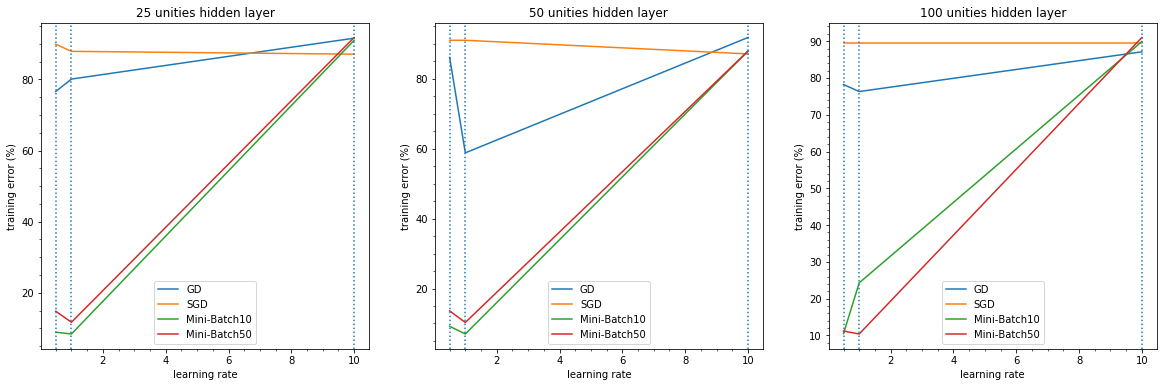

In [54]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(inputsGD[0], outputsGD[0], label='GD')
ax1.plot(inputsSGD[0], outputsSGD[0], label='SGD')
ax1.plot(inputsMiniBatch10[0], outputsMiniBatch10[0], label='Mini-Batch10')
ax1.plot(inputsMiniBatch50[0], outputsMiniBatch50[0], label='Mini-Batch50')
ax1.axvline(x=0.5, ls='dotted')
ax1.axvline(x=1, ls='dotted')
ax1.axvline(x=10, ls='dotted')
ax1.minorticks_on()
ax1.legend()
ax1.set_xlabel('learning rate')
ax1.set_ylabel('training error (%)')
ax1.set_title('25 unities hidden layer')

ax2.plot(inputsGD[1], outputsGD[1], label='GD')
ax2.plot(inputsSGD[1], outputsSGD[1], label='SGD')
ax2.plot(inputsMiniBatch10[1], outputsMiniBatch10[1], label='Mini-Batch10')
ax2.plot(inputsMiniBatch50[1], outputsMiniBatch50[1], label='Mini-Batch50')
ax2.axvline(x=0.5, ls='dotted')
ax2.axvline(x=1, ls='dotted')
ax2.axvline(x=10, ls='dotted')
ax2.minorticks_on()
ax2.legend()
ax2.set_xlabel('learning rate')
ax2.set_ylabel('training error (%)')
ax2.set_title('50 unities hidden layer')

ax3.plot(inputsGD[2], outputsGD[2], label='GD')
ax3.plot(inputsSGD[2], outputsSGD[2], label='SGD')
ax3.plot(inputsMiniBatch10[2], outputsMiniBatch10[2], label='Mini-Batch10')
ax3.plot(inputsMiniBatch50[2], outputsMiniBatch50[2], label='Mini-Batch50')
ax3.axvline(x=0.5, ls='dotted')
ax3.axvline(x=1, ls='dotted')
ax3.axvline(x=10, ls='dotted')
ax3.minorticks_on()
ax3.legend()
ax3.set_xlabel('learning rate')
ax3.set_ylabel('training error (%)')
ax3.set_title('100 unities hidden layer')
f.savefig('img/comparison-hidden-layer.png', bbox_inches='tight', dpi = 100)

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados acima que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIS), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois gradientes em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o meno4 valor testado e 10 o maior valor testado). 
//Checar essa afirmação após os testes
A junção dos resultados é mostrada nos três gráficos gerados logo acima. Assim, o mini-batch foi o gradiente mais eficiente entre os testados, com destaque para o mini-batch de 10 batches que obteve resultados ligeiramente melhores do que o mini-batch de 50. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. É importante notar que o learning rate de 10 sempre convergiu para os 4 tipos de gradientes testados, no sentido de que todos eles obtiveram resultados muitos ruins com este learning rate. Como vimos em sala de aula, muitos dos modelos de machine learning amplamente usados na academia usam um learning rate de 0.1. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era altíssimo para o problema de classificação de imagens. Sendo que este learning rate obteve um training error de cerca de 90% para todos os 3 gradientes testados independente das outras métricas do modelo.

Desta forma, eu aprendi que em uma análise real do MNIST o mais adequado seria ter um conjunto de treino (assim como foi testado o modelo), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste se estivéssemos tratando de um caso real de aplicação de machine learning. Em relação ao aumento das unidades da camada oculta para os três algoritmos, vamos realizar um teste exclusivo deste parâmetro para sabermos o seu real comportamento no conjunto de treino, para tal, o learning rate vai ser fixado em 0.5, que como visto nos três gráficos acima é o melhor learning rate obtido para quase todos gradientes. Somente o GD obteve resultados minimamente melhores com um learning rate de 1 em vez de 0.5. 

Como visto no gráfico abaixo, o aumento no número de unidades da camada oculta é relevante para o mini-batch de 10, onde os melhores resultados são encontrados com 100 unidades na camada oculta. Todavia, este aumento não se mostrou relevante para os outros gradientes, detalhe para o mini-batch de 50 que obteve piores resultados com 100 unidades na camada oculta do que com somente 50 (que foram os melhores resultados obtidos por esse gradiente). 

In [55]:
# GD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'gd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 3s 701us/step - loss: 2.3931 - acc: 0.1045 - val_loss: 2.3409 - val_acc: 0.1140
Epoch 2/10
4000/4000 [==============================] - 0s 64us/step - loss: 2.3530 - acc: 0.1072 - val_loss: 2.3088 - val_acc: 0.1240
Epoch 3/10
4000/4000 [==============================] - 0s 60us/step - loss: 2.3019 - acc: 0.1187 - val_loss: 2.2805 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 61us/step - loss: 2.2860 - acc: 0.1125 - val_loss: 2.2797 - val_acc: 0.1910
Epoch 5/10
4000/4000 [==============================] - 0s 64us/step - loss: 2.2752 - acc: 0.1980 - val_loss: 2.2642 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 61us/step - loss: 2.2666 - acc: 0.1125 - val_loss: 2.2625 - val_acc: 0.2840
Epoch 7/10
4000/4000 [==============================] - 0s 66us/step - loss: 2.2582 - acc: 0.3047 - val_loss: 2.2496 - val_acc: 0.1340
Epoch 

In [56]:
# SGD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'sgd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 48s 12ms/step - loss: 4.8582 - acc: 0.0992 - val_loss: 3.9782 - val_acc: 0.1290
Epoch 2/10
4000/4000 [==============================] - 38s 10ms/step - loss: 4.4251 - acc: 0.1012 - val_loss: 4.7825 - val_acc: 0.0840
Epoch 3/10
4000/4000 [==============================] - 36s 9ms/step - loss: 2.8390 - acc: 0.1893 - val_loss: 3.7601 - val_acc: 0.1720
Epoch 4/10
4000/4000 [==============================] - 44s 11ms/step - loss: 3.1523 - acc: 0.1807 - val_loss: 4.2691 - val_acc: 0.0840
Epoch 5/10
4000/4000 [==============================] - 47s 12ms/step - loss: 3.2757 - acc: 0.1608 - val_loss: 3.0973 - val_acc: 0.0840
Epoch 6/10
4000/4000 [==============================] - 41s 10ms/step - loss: 3.2459 - acc: 0.1700 - val_loss: 3.2514 - val_acc: 0.2190
Epoch 7/10
4000/4000 [==============================] - 49s 12ms/step - loss: 3.2331 - acc: 0.1682 - val_loss: 2.9890 - val_acc: 0.2140
E

In [57]:
# MB10.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb10', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 9s 2ms/step - loss: 1.5505 - acc: 0.4443 - val_loss: 0.7286 - val_acc: 0.7780
Epoch 2/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6461 - acc: 0.7825 - val_loss: 0.6158 - val_acc: 0.8040
Epoch 3/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4307 - acc: 0.8647 - val_loss: 0.5233 - val_acc: 0.8490
Epoch 4/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.3348 - acc: 0.8942 - val_loss: 0.4575 - val_acc: 0.8740
Epoch 5/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2817 - acc: 0.9120 - val_loss: 0.5677 - val_acc: 0.8240
Epoch 6/10
4000/4000 [==============================] - 4s 920us/step - loss: 0.2385 - acc: 0.9275 - val_loss: 0.4230 - val_acc: 0.8770
Epoch 7/10
4000/4000 [==============================] - 4s 901us/step - loss: 0.1924 - acc: 0.9397 - val_loss: 0.3937 - val_acc: 0.8830
Epoch 8/10

In [58]:
# MB50.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb50', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 2.1141 - acc: 0.2387 - val_loss: 1.6009 - val_acc: 0.4180
Epoch 2/10
4000/4000 [==============================] - 1s 241us/step - loss: 1.3060 - acc: 0.5608 - val_loss: 0.8789 - val_acc: 0.7710
Epoch 3/10
4000/4000 [==============================] - 1s 250us/step - loss: 0.8081 - acc: 0.7455 - val_loss: 0.6575 - val_acc: 0.8140
Epoch 4/10
4000/4000 [==============================] - 1s 250us/step - loss: 0.6081 - acc: 0.8105 - val_loss: 0.5647 - val_acc: 0.8440
Epoch 5/10
4000/4000 [==============================] - 1s 281us/step - loss: 0.5138 - acc: 0.8440 - val_loss: 0.4909 - val_acc: 0.8520
Epoch 6/10
4000/4000 [==============================] - 1s 296us/step - loss: 0.4439 - acc: 0.8640 - val_loss: 0.4987 - val_acc: 0.8550
Epoch 7/10
4000/4000 [==============================] - 1s 263us/step - loss: 0.4119 - acc: 0.8707 - val_loss: 0.4168 - val_acc: 0.8740
Ep

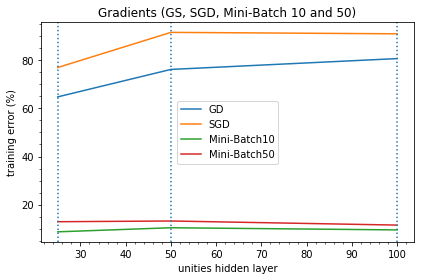

In [59]:
index = 3

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Gradients (GS, SGD, Mini-Batch 10 and 50)")
plt.legend()
plt.tight_layout()
plt.savefig('img/comparison-gradients.png', bbox_inches='tight', dpi = 100)
plt.show()

# Testes Complementares

#### Apesar de não estar previsto no enunciado do TP, vamos variar alguns dos parâmetros:

## <span style="color:blue"> Setar para somente uma única época comparando com learning rate </span>

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 18s 5ms/step - loss: 1.6624 - acc: 0.3950 - val_loss: 0.8964 - val_acc: 0.7100
29.0
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 15s 4ms/step - loss: 2.1866 - acc: 0.2175 - val_loss: 1.4669 - val_acc: 0.4520
54.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 14s 3ms/step - loss: 14.6016 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
91.0


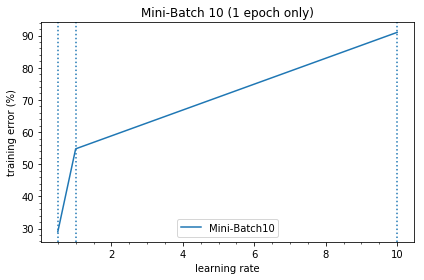

In [127]:
lr = [0.5, 1, 10]
un = [100, 100, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch10')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.tight_layout()
plt.savefig('img/one-epoch.png', bbox_inches='tight', dpi = 100)
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando o learning rate): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## <span style="color:blue">Setar para somente uma única época comparando com as unidades da camada oculta</span>

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 11s 3ms/step - loss: 1.6268 - acc: 0.4085 - val_loss: 0.9101 - val_acc: 0.6860
31.39999999999999
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 12s 3ms/step - loss: 1.7382 - acc: 0.3603 - val_loss: 0.9710 - val_acc: 0.6720
32.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 14s 4ms/step - loss: 1.9172 - acc: 0.3455 - val_loss: 0.9408 - val_acc: 0.6500
35.0


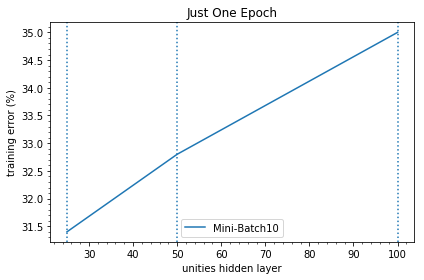

In [117]:
lr = [0.5, 0.5, 0.5]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch10')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Just One Epoch")
plt.legend()
plt.tight_layout()
plt.savefig('img/one-epoch-unities.png', bbox_inches='tight', dpi = 100)
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando as unidades da camada oculta): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## Many opoches

In [100]:
lr = [0.5, 0.5, 0.5]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch10')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Many epochs")
plt.legend()
plt.tight_layout()
plt.savefig('img/many-epochs-unities.png', bbox_inches='tight', dpi = 100)
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 38s 9ms/step - loss: 2.4501 - acc: 0.0958 - val_loss: 2.4955 - val_acc: 0.0840
Epoch 2/50
4000/4000 [==============================] - 10s 2ms/step - loss: 2.4777 - acc: 0.1018 - val_loss: 2.4821 - val_acc: 0.0840
Epoch 3/50
4000/4000 [==============================] - 9s 2ms/step - loss: 2.4534 - acc: 0.1013 - val_loss: 2.3270 - val_acc: 0.1120
Epoch 4/50
4000/4000 [==============================] - 8s 2ms/step - loss: 2.4375 - acc: 0.1008 - val_loss: 2.3916 - val_acc: 0.1210
Epoch 5/50
4000/4000 [==============================] - 8s 2ms/step - loss: 2.4413 - acc: 0.1045 - val_loss: 2.3499 - val_acc: 0.1120
Epoch 6/50
4000/4000 [==============================] - 9s 2ms/step - loss: 2.4532 - acc: 0.0990 - val_loss: 2.4059 - val_acc: 0.0920
Epoch 7/50
4000/4000 [==============================] - 8s 2ms/step - loss: 2.4552 - acc: 0.1023 - val_loss: 2.4404 - val_acc: 0.1010
Epoch 8/50
4

KeyboardInterrupt: 

## Setar o learning rate para 0.1

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 17s 4ms/step - loss: 1.9583 - acc: 0.3445 - val_loss: 1.4422 - val_acc: 0.4560
Epoch 2/10
4000/4000 [==============================] - 5s 1ms/step - loss: 1.0372 - acc: 0.7085 - val_loss: 0.7980 - val_acc: 0.7790
Epoch 3/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6777 - acc: 0.8092 - val_loss: 0.5912 - val_acc: 0.8390
Epoch 4/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5275 - acc: 0.8457 - val_loss: 0.5163 - val_acc: 0.8530
Epoch 5/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4489 - acc: 0.8655 - val_loss: 0.4589 - val_acc: 0.8700
Epoch 6/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.3955 - acc: 0.8802 - val_loss: 0.4545 - val_acc: 0.8670
Epoch 7/10
4000/4000 [==============================] - 6s 1ms/step - loss: 0.3625 - acc: 0.8937 - val_loss: 0.4401 - val_acc: 0.8740
Epoch 8/10
40

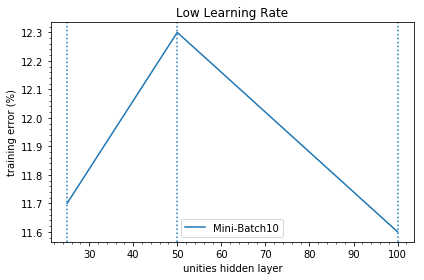

In [120]:
lr = [0.1, 0.1, 0.1]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch10')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Low Learning Rate")
plt.legend()
plt.tight_layout()
plt.savefig('img/low-learning-rate.png', bbox_inches='tight', dpi = 100)
plt.show()

### Discussão sobre diminuir o learning rate: Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## Muitos batches

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 11s 3ms/step - loss: 2.2541 - acc: 0.1737 - val_loss: 2.2695 - val_acc: 0.1480
Epoch 2/10
4000/4000 [==============================] - 0s 112us/step - loss: 2.1029 - acc: 0.2485 - val_loss: 2.0136 - val_acc: 0.1940
Epoch 3/10
4000/4000 [==============================] - 1s 131us/step - loss: 1.8880 - acc: 0.3630 - val_loss: 1.6658 - val_acc: 0.4800
Epoch 4/10
4000/4000 [==============================] - 1s 126us/step - loss: 1.5842 - acc: 0.5013 - val_loss: 1.5701 - val_acc: 0.5060
Epoch 5/10
4000/4000 [==============================] - 0s 121us/step - loss: 1.3549 - acc: 0.5733 - val_loss: 1.1240 - val_acc: 0.6920
Epoch 6/10
4000/4000 [==============================] - 0s 119us/step - loss: 1.0728 - acc: 0.6985 - val_loss: 1.0462 - val_acc: 0.6850
Epoch 7/10
4000/4000 [==============================] - 1s 126us/step - loss: 0.9419 - acc: 0.7378 - val_loss: 1.0047 - val_acc: 0.6550
E

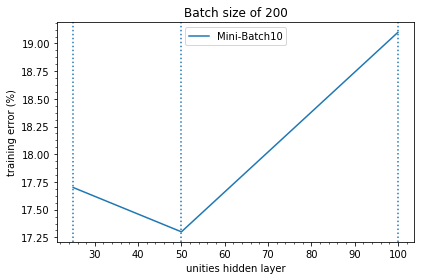

In [121]:
lr = [0.5, 0.5, 0.5]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch10')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Batch size of 200")
plt.legend()
plt.tight_layout()
plt.savefig('img/batches-maiores.png', bbox_inches='tight', dpi = 100)
plt.show()

## Usar relu

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 21s 5ms/step - loss: 2.1029 - acc: 0.3160 - val_loss: 1.8775 - val_acc: 0.4630
Epoch 2/10
4000/4000 [==============================] - 1s 351us/step - loss: 1.6495 - acc: 0.5805 - val_loss: 1.4596 - val_acc: 0.6350
Epoch 3/10
4000/4000 [==============================] - 1s 329us/step - loss: 1.2796 - acc: 0.7173 - val_loss: 1.1402 - val_acc: 0.7670
Epoch 4/10
4000/4000 [==============================] - 1s 358us/step - loss: 1.0008 - acc: 0.7885 - val_loss: 0.9046 - val_acc: 0.7960
Epoch 5/10
4000/4000 [==============================] - 1s 346us/step - loss: 0.8134 - acc: 0.8127 - val_loss: 0.7609 - val_acc: 0.8200
Epoch 6/10
4000/4000 [==============================] - 1s 364us/step - loss: 0.6945 - acc: 0.8332 - val_loss: 0.6793 - val_acc: 0.8290
Epoch 7/10
4000/4000 [==============================] - 1s 309us/step - loss: 0.6157 - acc: 0.8462 - val_loss: 0.6158 - val_acc: 0.8460
E

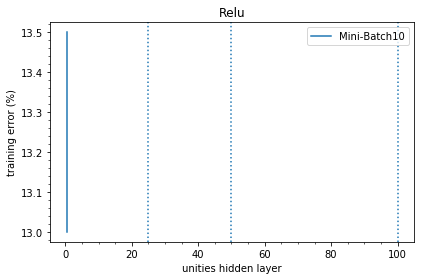

In [124]:
# Define model
def baseline_model_relu(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(unity, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=0.01)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

lr = [0.5, 0.5, 0.5]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model_relu(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch10')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Relu")
plt.legend()
plt.tight_layout()
plt.savefig('img/relu.png', bbox_inches='tight', dpi = 100)
plt.show()

## Usar some 2 camadas

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 7s 2ms/step - loss: 8.1742 - acc: 0.3788 - val_loss: 8.3526 - val_acc: 0.4390
56.1
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 6s 2ms/step - loss: 12.5358 - acc: 0.1410 - val_loss: 14.4902 - val_acc: 0.1010
89.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 6s 2ms/step - loss: 14.4518 - acc: 0.1020 - val_loss: 14.6352 - val_acc: 0.0920
90.8


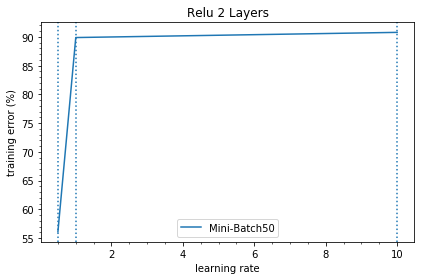

In [64]:
# Define model
def baseline_model_relu(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

lr = [0.5, 1, 10]
un = [100, 100, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model_relu(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Relu 2 Layers")
plt.legend()
plt.tight_layout()
plt.savefig('img/relu-2-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

## Usar adam como gradient

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 14s 3ms/step - loss: 0.5022 - acc: 0.8455 - val_loss: 0.4484 - val_acc: 0.8620
Epoch 2/10
4000/4000 [==============================] - 8s 2ms/step - loss: 0.1938 - acc: 0.9392 - val_loss: 0.2982 - val_acc: 0.9070
Epoch 3/10
4000/4000 [==============================] - 6s 1ms/step - loss: 0.1136 - acc: 0.9647 - val_loss: 0.3053 - val_acc: 0.9070
Epoch 4/10
4000/4000 [==============================] - 6s 1ms/step - loss: 0.0556 - acc: 0.9862 - val_loss: 0.2752 - val_acc: 0.9180
Epoch 5/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0367 - acc: 0.9910 - val_loss: 0.3337 - val_acc: 0.9100
Epoch 6/10
4000/4000 [==============================] - 7s 2ms/step - loss: 0.0395 - acc: 0.9877 - val_loss: 0.2626 - val_acc: 0.9240
Epoch 7/10
4000/4000 [==============================] - 7s 2ms/step - loss: 0.0194 - acc: 0.9947 - val_loss: 0.2961 - val_acc: 0.9260
Epoch 8/10
40

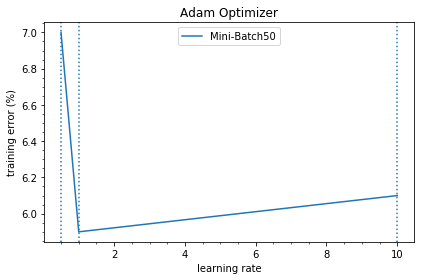

In [81]:
# Define model
def baseline_model_relu(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lr = [0.5, 1, 10]
un = [50, 50, 50]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model_relu(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Adam Optimizer")
plt.legend()
plt.tight_layout()
plt.savefig('img/adam-gradient.png', bbox_inches='tight', dpi = 100)
plt.show()

## More data

In [144]:
from keras.datasets import mnist
from keras.layers.core import Flatten
(A_train, B_train), (A_test, B_test) = mnist.load_data()
num_pixels = A_train.shape[1] * A_train.shape[2]
A_train = A_train.reshape(A_train.shape[0], num_pixels).astype('float32')
A_test = A_test.reshape(A_test.shape[0], num_pixels).astype('float32')

In [145]:
A_train = A_train / 255
A_test = A_test / 255

In [146]:
B_train = np_utils.to_categorical(B_train)
B_test = np_utils.to_categorical(B_test)
num_classes = y_test.shape[1]

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.5203 - acc: 0.8462 - val_loss: 0.2711 - val_acc: 0.9198
Epoch 2/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2629 - acc: 0.9215 - val_loss: 0.2276 - val_acc: 0.9332
Epoch 3/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2083 - acc: 0.9383 - val_loss: 0.1811 - val_acc: 0.9456
Epoch 4/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1697 - acc: 0.9504 - val_loss: 0.1561 - val_acc: 0.9554
Epoch 5/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.1412 - acc: 0.9588 - val_loss: 0.1311 - val_acc: 0.9605
Epoch 6/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.1204 - acc: 0.9642 - val_loss: 0.1239 - val_acc: 0.9635
Epoch 7/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1034 - acc: 0.9697 - val_loss: 0.1116 - val_a

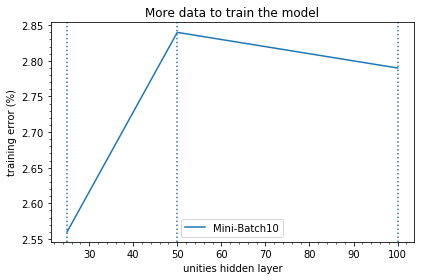

In [149]:
lr = [0.1, 0.1, 0.1]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(A_train, B_train, validation_data=(A_test, B_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(A_test, B_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch10')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("More data to train the model")
plt.legend()
plt.tight_layout()
plt.savefig('img/more-data.png', bbox_inches='tight', dpi = 100)
plt.show()
